In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/SAI/Waste_Images_exper/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/SAI/Waste_Images_exper/test", target_size=(224,224))
vadata = ImageDataGenerator()
valdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/SAI/Waste_Images_exper/valid", target_size=(224,224))

Found 1521 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [ ]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [ ]:
X= vggmodel.layers[-2].output
predictions = Dense(6, activation="softmax")(X)
model_final = Model(vggmodel.input, predictions)

In [ ]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_keras_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist = model_final.fit(x=traindata, steps_per_epoch=40, validation_steps=10, validation_data=valdata, epochs=20, verbose=1)
model_final.save_weights("vgg16_keras_1.h5")

Epoch 1/20
40/40 [==============================] - 9s 233ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.8250
Epoch 2/20
40/40 [==============================] - 9s 230ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.4935 - val_accuracy: 0.8188
Epoch 3/20
40/40 [==============================] - 9s 232ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.5234 - val_accuracy: 0.8375
Epoch 4/20
40/40 [==============================] - 9s 234ms/step - loss: 0.0100 - accuracy: 0.9992 - val_loss: 0.5893 - val_accuracy: 0.8094
Epoch 5/20
40/40 [==============================] - 9s 237ms/step - loss: 0.0089 - accuracy: 0.9992 - val_loss: 0.5024 - val_accuracy: 0.8219
Epoch 6/20
40/40 [==============================] - 10s 239ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.5518 - val_accuracy: 0.8281
Epoch 7/20
40/40 [==============================] - 9s 235ms/step - loss: 0.0081 - accuracy: 0.9992 - val_loss: 0.5494 - val_accuracy: 0.8406
Epoch

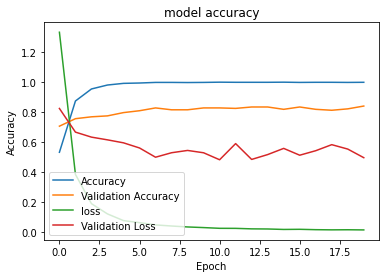

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
predictions = model_final.predict(x=testdata, verbose=1, steps=16)

16/16 [==============================] - 3s 173ms/step


In [ ]:
import numpy as np
np.round(predictions)

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=testdata.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
testdata.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Confusion matrix, without normalization
[[13 16 14 21 13  3]
 [14 21 20 28 16  1]
 [13 19 11 22 15  2]
 [24 27 13 29 21  4]
 [12 21 22 22 11  8]
 [ 3  4  6  9  4  1]]


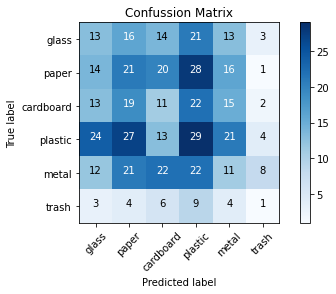

In [ ]:
import itertools
cm_plot_labels = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confussion Matrix')